In [81]:
import requests
import calendar
import matplotlib.pyplot as plt
import pandas as pd 

In [82]:
api_key = 'ffd953bc651e3a0d51f559e3d8d5c7bd'
api_call = 'https://api.openweathermap.org/data/2.5/forecast?appid=' + api_key

In [83]:
temps_pred = []
humidity_pred = []

In [84]:
city = input('Please input the city name: ')
api_call += '&q=' + city

In [85]:
json_data = requests.get(api_call).json()

In [86]:
location_data = {
        'city': json_data['city']['name'],
        'country': json_data['city']['country']
    }

In [87]:
print('\n{city}, {country}'.format(**location_data))


London, GB


In [88]:
current_date = ''
for item in json_data['list']:        
        time = item['dt_txt']
        next_date, hour = time.split(' ')

        if current_date != next_date:
            current_date = next_date
            year, month, day = current_date.split('-')
            date = {'y': year, 'm': month, 'd': day}
            print('\n{m}/{d}/{y}'.format(**date))
                
        hour = int(hour[:2])
        
        if hour < 12:
            if hour == 0:
                hour = 12
            meridiem = 'AM'
        else:
            if hour > 12:
                hour -= 12
            meridiem = 'PM'
        
        print('\n%i:00 %s' % (hour, meridiem))

        # Temperature is measured in Kelvin
        temperature = item['main']['temp']
        humidity = item["main"]["humidity"]                       
        print('Celcius: {:.2f}'.format(temperature - 273.15))
        print('Humidity: {:.2f}'.format(humidity))        
        temps_pred.append(temperature - 273.15)
        humidity_pred.append(humidity)


06/07/2021

6:00 AM
Celcius: 14.36
Humidity: 90.00

9:00 AM
Celcius: 15.94
Humidity: 82.00

12:00 PM
Celcius: 19.51
Humidity: 65.00

3:00 PM
Celcius: 20.14
Humidity: 71.00

6:00 PM
Celcius: 18.72
Humidity: 79.00

9:00 PM
Celcius: 15.81
Humidity: 90.00

06/08/2021

12:00 AM
Celcius: 14.26
Humidity: 94.00

3:00 AM
Celcius: 12.47
Humidity: 93.00

6:00 AM
Celcius: 13.28
Humidity: 75.00

9:00 AM
Celcius: 17.99
Humidity: 54.00

12:00 PM
Celcius: 21.27
Humidity: 38.00

3:00 PM
Celcius: 22.20
Humidity: 39.00

6:00 PM
Celcius: 20.71
Humidity: 47.00

9:00 PM
Celcius: 16.82
Humidity: 68.00

06/09/2021

12:00 AM
Celcius: 15.08
Humidity: 77.00

3:00 AM
Celcius: 13.12
Humidity: 81.00

6:00 AM
Celcius: 14.54
Humidity: 66.00

9:00 AM
Celcius: 19.21
Humidity: 38.00

12:00 PM
Celcius: 22.57
Humidity: 32.00

3:00 PM
Celcius: 23.23
Humidity: 38.00

6:00 PM
Celcius: 21.36
Humidity: 51.00

9:00 PM
Celcius: 17.75
Humidity: 74.00

06/10/2021

12:00 AM
Celcius: 15.89
Humidity: 89.00

3:00 AM
Celcius: 14.55
Hu

In [89]:
df = pd.DataFrame(list(zip(temps_pred, humidity_pred)), columns =['temps', 'humidities'])
df

,temps,humidities
0,14.36,90
1,15.94,82
2,19.51,65
3,20.14,71
4,18.72,79
5,15.81,90
6,14.26,94
7,12.47,93
8,13.28,75
9,17.99,54


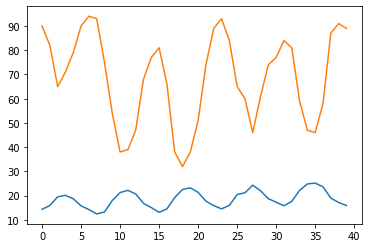

In [90]:
plt.plot(df)
plt.show() 

In [91]:
############################

In [92]:
inf = pd.read_csv("infection.csv")
df2 = inf.copy()

In [93]:
df2.head()

,temperature,hoursMild,hoursMid,hoursSevere
0,25.5,13.0,17,26
1,25.0,11.0,14,21
2,24.4,9.5,12,19
3,23.9,9.0,12,18
4,16.7,9.0,12,19


In [94]:
##############################

In [95]:
def check_warning(dataframe_prediction, dataframe_infection):
    temp = dataframe_infection["temperature"]
    mild = dataframe_infection["hoursMild"]
    mid = dataframe_infection["hoursMid"]
    severe = dataframe_infection["hoursSevere"]
    temp_pred = dataframe_prediction["temps"]
    hum_pred = dataframe_prediction["humidities"]
    for i in range(len(temp_pred)):
        for k in range(len(temp)):
            if(temp_pred[i] >= temp[k]):
                if(hum_pred[i] >= 30):
                     print(str(temp_pred[i]) + " is the predicted temperature and the limit is:  " +
                     str(temp[k]) + 
                     " You better decrease humidity or temperature." + 
                     " Severe damage will happen in : " + str(severe[k]) + " hours." +
                     " Mid damage will happen in : " +  str(mid[k]) + " hours." +
                     " Mild damage will happen in : " + str(mild[k]) + " hours.")
                     return


In [96]:
check_warning(df, df2)

14.360000000000014 is the predicted temperature and the limit is:  13.9 You better decrease humidity or temperature. Severe damage will happen in : 22 hours. Mid damage will happen in : 14 hours. Mild damage will happen in : 10.0 hours.
